In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [13]:
# Read the csv file into a pandas DataFrame
df1 = pd.read_csv('data/winequality-red.csv', sep=';')
df2 = pd.read_csv('data/winequality-white.csv', sep=';')
# Drop the null columns where all values are null
df1 = df1.dropna(axis='columns', how='all')
df2 = df2.dropna(axis='columns', how='all')
# Drop the null rows
df1 = df1.dropna()
df2 = df2.dropna()
# Merge two dataframes
df = df1.merge(df2, how='outer')

# pick white/red
# df = df2 # pick white
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6490,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6491,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6492,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6493,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [14]:
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 9)
group_names = [0, 1]
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [15]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [16]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [17]:
# Assign the data to X and y

#X = df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
X = df[["citric acid", "residual sugar", "chlorides", "alcohol"]]
y = df["quality"].values.reshape(-1, 1)
print(X.shape, y.shape)

(6495, 4) (6495, 1)


In [18]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [19]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [20]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.15321657938438582
Testing Score: 0.19388026361481647


Text(0.5, 1.0, 'Residual Plot')

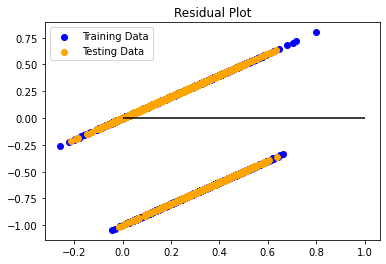

In [21]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [22]:
# save fitted model to file
import joblib
filename = 'multi-variable-linear.sav'
joblib.dump(model, filename)

['multi-variable-linear.sav']